In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn nltk wordcloud

**Import** **Libraries**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import random

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Load** **Dataset**

In [ ]:
# If uploaded to Colab directly
df = pd.read_csv('/content/INSTAGRAM_REVIEWS.csv')

df.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,ff25650a-a9e1-4c02-a8e8-0c85b9ee1dc9,127325963209728431078,B ****or,Used this app for years. Was a great way to es...,1,0,216.1.0.21.137,2022-01-05 23:37:15
1,1,7e1840fe-4307-4c97-974c-437ec6c64e60,148177168797697591284,مس*******لو,khayemalo sag bgad,5,0,155.0.0.37.107,2022-01-05 23:39:29
2,2,3c8ba6fc-3009-4b1c-9a24-9ea635799a9a,162050472706594017332,Li********on,Lovely,5,0,NaN,2022-01-05 23:39:32
3,3,47c54668-dbac-4f8f-a98a-3ede00a103ea,264067006274581079256,Fa******Zx,best,5,0,NaN,2022-01-05 23:39:50
4,4,464a6a51-9a9f-44b0-80b5-eeea24adcd57,224172402296862948810,fr***************67,Super,5,0,216.0.0.20.137,2022-01-05 23:40:08


In [19]:
# Select columns and drop missing
df = df[['review_text','review_rating']].dropna()  # Adjust if column names differ
# Binary sentiment: 1 for positive (>3), 0 for negative (≤3)
df['sentiment'] = df['review_rating'].apply(lambda x: 1 if x > 3 else 0)



,review_text,review_rating,sentiment,clean_content
0,Used this app for years. Was a great way to es...,1,0,used app year great way escape overly politica...
1,khayemalo sag bgad,5,1,khayemalo sag bgad
2,Lovely,5,1,lovely
3,best,5,1,best
4,Super,5,1,super


**Preprocess** **Text**

In [32]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = re.sub(r'\s+', ' ', text)
    return text

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = clean_text(text)
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return ' '.join(words)

df['clean_content'] = df['review_text'].apply(preprocess)
df.head()

,review_text,review_rating,sentiment,clean_content
0,Used this app for years. Was a great way to es...,1,0,used app year great way escape overly politica...
1,khayemalo sag bgad,5,1,khayemalo sag bgad
2,Lovely,5,1,lovely
3,best,5,1,best
4,Super,5,1,super


**Train** **Model**

In [33]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_content']).toarray()
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

**Evaluation**

In [37]:
y_pred = clf.predict(X_test)
print("Model trained successfully")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#cm = confusion_matrix(y_test, y_pred)
#plt.figure(figsize=(6,4))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
##plt.ylabel('Actual')
#plt.xlabel('Predicted')
#plt.title('Confusion Matrix')
#plt.show()

Model trained successfully
Accuracy Score: 0.8400375779315057
              precision    recall  f1-score   support

           0       0.77      0.56      0.65      6135
           1       0.86      0.94      0.90     17283

    accuracy                           0.84     23418
   macro avg       0.81      0.75      0.77     23418
weighted avg       0.83      0.84      0.83     23418



**Visualize** **Top** **Words**

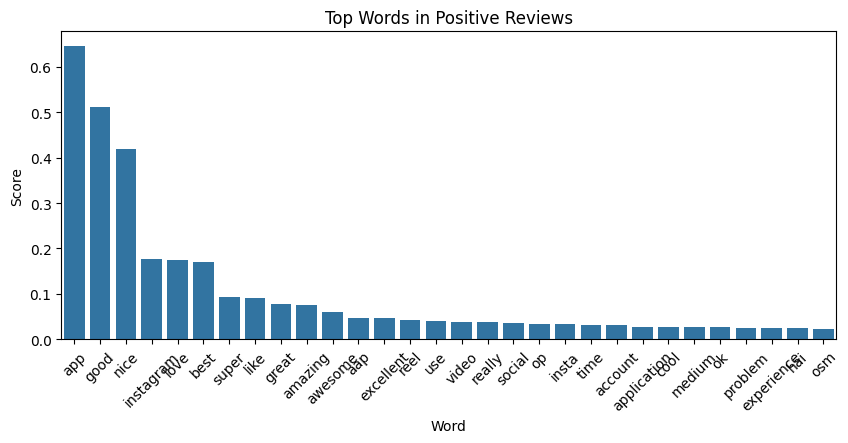

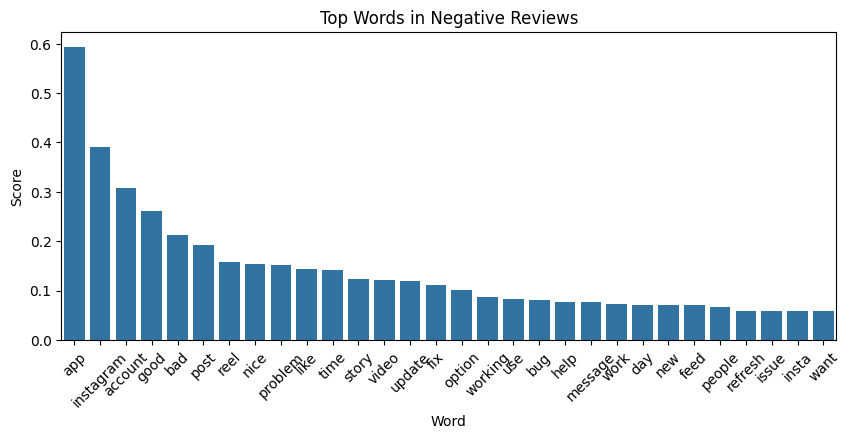

In [41]:
pos_words = ' '.join(df[df['sentiment']==1]['clean_content'])
neg_words = ' '.join(df[df['sentiment']==0]['clean_content'])

def plot_top_words(text, title):
    vec = TfidfVectorizer(stop_words='english', max_features=30)
    features = vec.fit_transform([text])
    words = vec.get_feature_names_out()
    scores = features.toarray()[0]
    sorted_words = pd.DataFrame({'Word':words, 'Score':scores}).sort_values('Score',ascending=False)
    plt.figure(figsize=(10,4))
    sns.barplot(x='Word',y='Score',data=sorted_words)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_top_words(pos_words, 'Top Words in Positive Reviews')
plot_top_words(neg_words, 'Top Words in Negative Reviews')

**Sentiment** **Distribution**

/tmp/ipython-input-4284014991.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


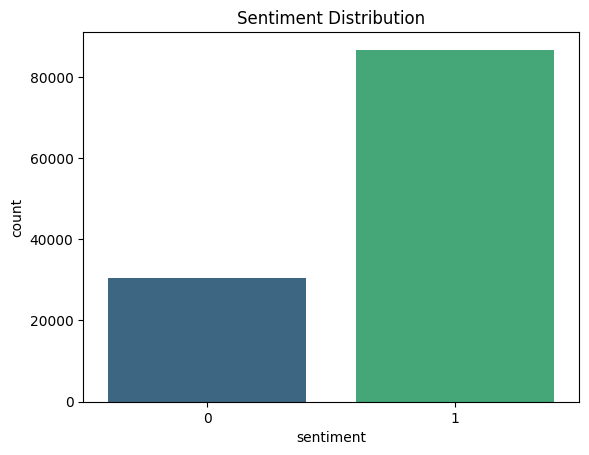

In [15]:
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

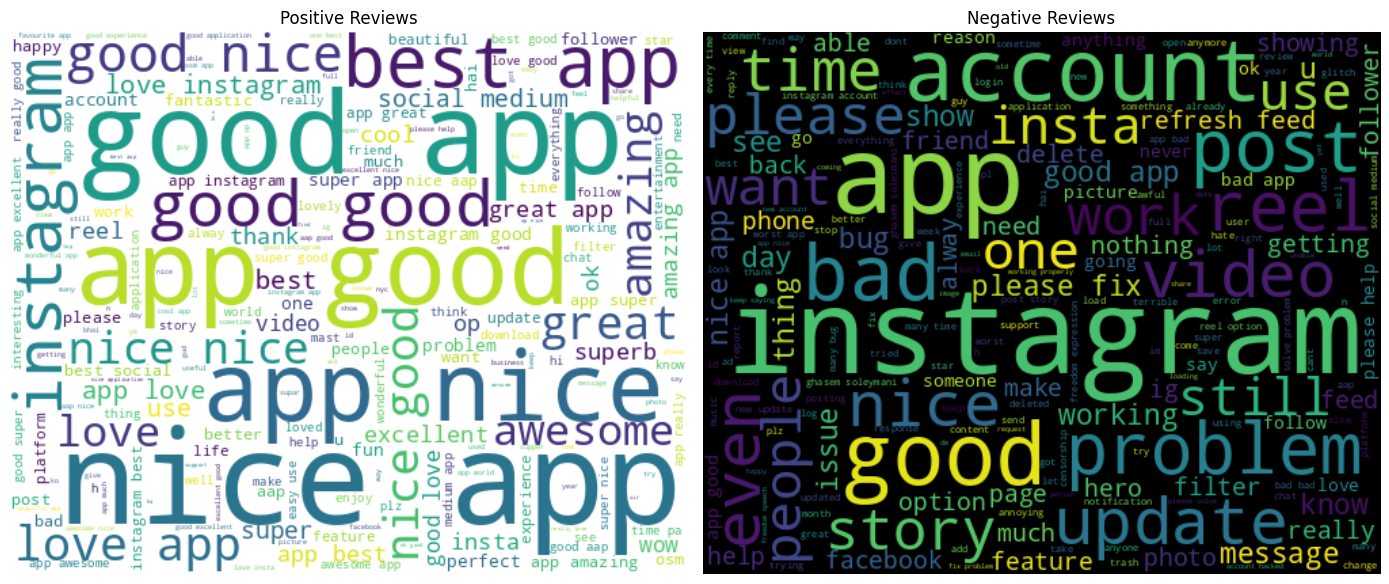

In [46]:
wordcloud_pos = WordCloud(width=500, height=400, background_color='white').generate(' '.join(df[df['sentiment']==1]['clean_content']))
wordcloud_neg = WordCloud(width=500, height=400, background_color='black').generate(' '.join(df[df['sentiment']==0]['clean_content']))

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')
plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')
plt.tight_layout()
plt.show()

**Interactive** **Mode**

In [39]:
def predict_sentiment(rating=None, comment=None):
    """Predict sentiment from rating or comment"""
    if rating is not None:
        try:
            rating = int(rating)
            return 1 if rating > 3 else 0
        except:
            return " Invalid rating. Please enter a number 1–5."
    elif comment is not None and comment.strip() != "":
        cleaned = preprocess(comment)
        vectorized = tfidf.transform([cleaned]).toarray()
        prediction = clf.predict(vectorized)[0]
        return int(prediction)
    else:
        return "Please provide a valid comment or rating."

def interactive_prediction():
    print("\n===== Sentiment Prediction =====")
    print("Choose option:")
    print("1 - Enter a Comment")
    print("2 - Enter a Rating")
    print("3 - Random Example from Dataset")
    print("4 - Quit")

    while True:
        choice = input("\nYour choice: ").strip().lower()
        if choice == '1':
            comment = input("Enter your comment: ")
            result = predict_sentiment(comment=comment)
            print(f"Prediction: {result} (1=Positive, 0=Negative)")
        elif choice == '2':
            rating = input("Enter rating (1-5): ")
            result = predict_sentiment(rating=rating)
            print(f"Prediction: {result} (1=Positive, 0=Negative)")
        elif choice == '3':
            # Correct column names based on the DataFrame's structure
            row = df.sample(1).iloc[0]
            print(f"\nRandom Dataset Example:\nRating: {row['review_rating']}\nComment: {row['review_text']}")
            pred = predict_sentiment(comment=row['review_text'])
            print(f"Predicted Sentiment: {pred} (1=Positive, 0=Negative)")
        elif choice == '4':
            print("Exiting interactive mode.")
            break
        else:
            print("Invalid choice. Please try again.")

In [47]:
interactive_prediction()


===== Sentiment Prediction =====
Choose option:
1 - Enter a Comment
2 - Enter a Rating
3 - Random Example from Dataset
4 - Quit

Your choice: 1
Enter your comment: Instagram App
Prediction: 1 (1=Positive, 0=Negative)

Your choice: 2
Enter rating (1-5): 4
Prediction: 1 (1=Positive, 0=Negative)

Your choice: 3

Random Dataset Example:
Rating: 2
Comment: It glitched out and made it super slow... I hate it I'm sorry..
Predicted Sentiment: 0 (1=Positive, 0=Negative)

Your choice: 4
Exiting interactive mode.
